# Linear Regression 

## import library

In [2]:
import numpy as np
import matplotlib.image as img
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from mpl_toolkits.mplot3d import Axes3D

## load point data for training and testing

In [3]:
fname_data  = 'assignment_07_data.csv'

data        = np.genfromtxt(fname_data, delimiter=',')
num_data    = data.shape[0]

xx          = np.zeros(num_data)
yy          = np.zeros(num_data)
zz          = np.zeros(num_data)

for i in range(num_data):

    xx[i] = data[i,0]
    yy[i] = data[i,1]
    zz[i] = data[i,2]

## plot the data in the three dimensional space

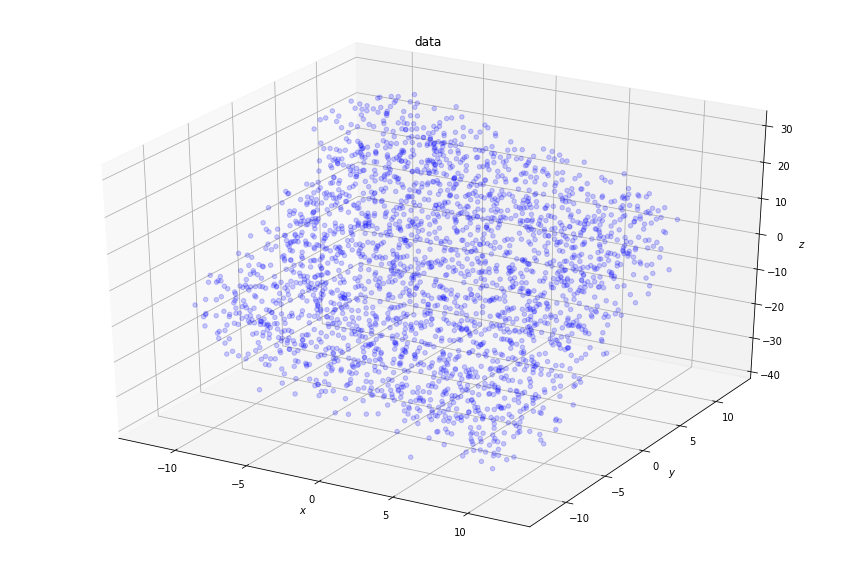

(3,)
(2500,)
(2500,)
[ -4.44258001 -11.13841865  -6.68718553 ...   6.78619211  12.84201454
  10.33594982]
[  4.44258001  11.13841865   6.68718553 ...  -6.78619211 -12.84201454
 -10.33594982]


In [4]:
fig = plt.figure(figsize=(12, 8))

ax1 = plt.subplot(111, projection='3d')
plt.title('data')

ax1.set_xlabel('$x$')
ax1.set_ylabel('$y$')
ax1.set_zlabel('$z$')

ax1.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)

plt.tight_layout()
plt.show()


X = np.zeros((xx.shape[0],3))
for i in range(0,xx.shape[0]):
    X[i] = [1, xx[i], yy[i]]

t = np.array((1,1,1))
print(t.shape)
a = X@t
print(a.shape)
print((zz.T).shape)
print(a - zz)
print(-1*(a - zz))

## compute the loss function

In [5]:
def compute_residual(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    
    num_data = x.shape[0]
    X = np.zeros((num_data,3))
    for i in range(0,num_data):
        X[i] = [1, x[i], y[i]]
    
    f_hat = X @ theta
    residual = z.T - f_hat
    
    # ============================
    return residual, num_data

In [6]:
def compute_loss(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    
    R, n = compute_residual(theta,x,y,z)
    R = -1*R
    loss = (1/n)*R.T@R
    
    #loss = 0
    #for i in range(0,x.shape[0]):
    #    r = theta[0] + theta[1]*x[i] + theta[2]*y[i] -z[i]
    #    loss = loss + r**2
    #        
    #loss = (1/(2*x.shape[0]))*loss
    
    # ============================
    return loss

## compute the gradient for each model parameter (DO NOT COMPUTE THE GRADIENT FOR EACH MODEL PARAMETER, BUT DO COMPUTE THE GRADIENT OF THE MODEL PARAMTER VECTOR)

In [7]:
def compute_gradient(theta, x, y, z):
    # ===== FILL UP THE CODE =====
    
    R, n = compute_residual(theta,x,y,z)
    R = -1*R
    
    X = np.zeros((n,3))
    for i in range(0,n):
        X[i] = [1, x[i], y[i]]
        
    grad = (2/n)*X.T@R    
        
    # ============================
    return grad

## gradient descent for each model parameter

In [8]:
num_iteration   = 1000
learning_rate   = 0.01

theta           = np.array((0, 0, 0))
theta_iteration = np.zeros((num_iteration, theta.size))
loss_iteration  = np.zeros(num_iteration)

for i in range(num_iteration):
    # ===== FILL UP THE CODE =====
    
    theta = theta - learning_rate*compute_gradient(theta,xx,yy,zz)
    loss = compute_loss(theta,xx,yy,zz)
    
    theta_iteration[i] = theta
    loss_iteration[i] = loss

    # ============================
    print("iteration = %4d, loss = %5.5f" % (i, loss))

iteration =    0, loss = 36.47383
iteration =    1, loss = 23.67882
iteration =    2, loss = 22.34121
iteration =    3, loss = 21.94253
iteration =    4, loss = 21.63132
iteration =    5, loss = 21.33822
iteration =    6, loss = 21.05721
iteration =    7, loss = 20.78736
iteration =    8, loss = 20.52820
iteration =    9, loss = 20.27930
iteration =   10, loss = 20.04026
iteration =   11, loss = 19.81068
iteration =   12, loss = 19.59020
iteration =   13, loss = 19.37844
iteration =   14, loss = 19.17508
iteration =   15, loss = 18.97976
iteration =   16, loss = 18.79218
iteration =   17, loss = 18.61203
iteration =   18, loss = 18.43901
iteration =   19, loss = 18.27284
iteration =   20, loss = 18.11326
iteration =   21, loss = 17.95999
iteration =   22, loss = 17.81279
iteration =   23, loss = 17.67143
iteration =   24, loss = 17.53566
iteration =   25, loss = 17.40526
iteration =   26, loss = 17.28003
iteration =   27, loss = 17.15976
iteration =   28, loss = 17.04425
iteration =   

iteration =  244, loss = 14.24334
iteration =  245, loss = 14.24332
iteration =  246, loss = 14.24331
iteration =  247, loss = 14.24329
iteration =  248, loss = 14.24327
iteration =  249, loss = 14.24326
iteration =  250, loss = 14.24324
iteration =  251, loss = 14.24323
iteration =  252, loss = 14.24322
iteration =  253, loss = 14.24320
iteration =  254, loss = 14.24319
iteration =  255, loss = 14.24318
iteration =  256, loss = 14.24317
iteration =  257, loss = 14.24316
iteration =  258, loss = 14.24315
iteration =  259, loss = 14.24313
iteration =  260, loss = 14.24313
iteration =  261, loss = 14.24312
iteration =  262, loss = 14.24311
iteration =  263, loss = 14.24310
iteration =  264, loss = 14.24309
iteration =  265, loss = 14.24308
iteration =  266, loss = 14.24307
iteration =  267, loss = 14.24307
iteration =  268, loss = 14.24306
iteration =  269, loss = 14.24305
iteration =  270, loss = 14.24305
iteration =  271, loss = 14.24304
iteration =  272, loss = 14.24303
iteration =  2

iteration =  493, loss = 14.24289
iteration =  494, loss = 14.24289
iteration =  495, loss = 14.24289
iteration =  496, loss = 14.24289
iteration =  497, loss = 14.24289
iteration =  498, loss = 14.24289
iteration =  499, loss = 14.24289
iteration =  500, loss = 14.24289
iteration =  501, loss = 14.24289
iteration =  502, loss = 14.24289
iteration =  503, loss = 14.24289
iteration =  504, loss = 14.24289
iteration =  505, loss = 14.24289
iteration =  506, loss = 14.24289
iteration =  507, loss = 14.24289
iteration =  508, loss = 14.24289
iteration =  509, loss = 14.24289
iteration =  510, loss = 14.24289
iteration =  511, loss = 14.24289
iteration =  512, loss = 14.24289
iteration =  513, loss = 14.24289
iteration =  514, loss = 14.24289
iteration =  515, loss = 14.24289
iteration =  516, loss = 14.24289
iteration =  517, loss = 14.24289
iteration =  518, loss = 14.24289
iteration =  519, loss = 14.24289
iteration =  520, loss = 14.24289
iteration =  521, loss = 14.24289
iteration =  5

iteration =  737, loss = 14.24289
iteration =  738, loss = 14.24289
iteration =  739, loss = 14.24289
iteration =  740, loss = 14.24289
iteration =  741, loss = 14.24289
iteration =  742, loss = 14.24289
iteration =  743, loss = 14.24289
iteration =  744, loss = 14.24289
iteration =  745, loss = 14.24289
iteration =  746, loss = 14.24289
iteration =  747, loss = 14.24289
iteration =  748, loss = 14.24289
iteration =  749, loss = 14.24289
iteration =  750, loss = 14.24289
iteration =  751, loss = 14.24289
iteration =  752, loss = 14.24289
iteration =  753, loss = 14.24289
iteration =  754, loss = 14.24289
iteration =  755, loss = 14.24289
iteration =  756, loss = 14.24289
iteration =  757, loss = 14.24289
iteration =  758, loss = 14.24289
iteration =  759, loss = 14.24289
iteration =  760, loss = 14.24289
iteration =  761, loss = 14.24289
iteration =  762, loss = 14.24289
iteration =  763, loss = 14.24289
iteration =  764, loss = 14.24289
iteration =  765, loss = 14.24289
iteration =  7

iteration =  978, loss = 14.24289
iteration =  979, loss = 14.24289
iteration =  980, loss = 14.24289
iteration =  981, loss = 14.24289
iteration =  982, loss = 14.24289
iteration =  983, loss = 14.24289
iteration =  984, loss = 14.24289
iteration =  985, loss = 14.24289
iteration =  986, loss = 14.24289
iteration =  987, loss = 14.24289
iteration =  988, loss = 14.24289
iteration =  989, loss = 14.24289
iteration =  990, loss = 14.24289
iteration =  991, loss = 14.24289
iteration =  992, loss = 14.24289
iteration =  993, loss = 14.24289
iteration =  994, loss = 14.24289
iteration =  995, loss = 14.24289
iteration =  996, loss = 14.24289
iteration =  997, loss = 14.24289
iteration =  998, loss = 14.24289
iteration =  999, loss = 14.24289


In [26]:
f = theta[0] + theta[1] * xx + theta[2] * yy
print(f)
print(zz)
print(theta)

[-15.25356807 -16.2026151  -12.75518522 ...   8.20540495  10.18465022
   6.0452287 ]
[-14.22640408  -6.7101767  -12.67089679 ...  13.25558254   7.92689264
  10.00816084]
[-3.00725346 -0.95822478  1.93915184]


## plot the results

In [9]:
def plot_loss_curve(loss_iteration):

    plt.figure(figsize=(8,6))
    plt.title('loss')
    # ===== FILL UP THE CODE =====
    
    plt.plot(list(range(0,len(loss_iteration))), loss_iteration, '-', color = 'red')

    # ============================
    plt.tight_layout()
    plt.show()

In [10]:
def plot_data(xx, yy, zz):
    
    fig = plt.figure(figsize=(12, 8))
    ax  = plt.subplot(111, projection='3d')
    plt.title('data')
    # ===== FILL UP THE CODE =====

    ax1 = plt.subplot(111, projection='3d')
    ax1.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)
    
    # ============================    
    plt.tight_layout()
    plt.show()

In [11]:

def plot_model_parameter(theta_iteration):

    plt.figure(figsize=(8,6))
    plt.title('model parameter')
    # ===== FILL UP THE CODE =====

    n = len(theta_iteration[0])
    plt.plot(list(range(0,n)), theta_iteration[0], '-', color = 'red')
    plt.plot(list(range(0,n)), theta_iteration[1], '-', color = 'green')
    plt.plot(list(range(0,n)), theta_iteration[2], '-', color = 'blue')

    # ============================
    plt.tight_layout()
    plt.show()

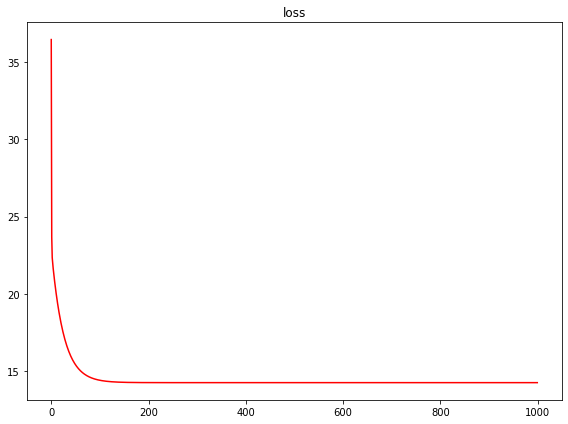

In [12]:
plot_loss_curve(loss_iteration)

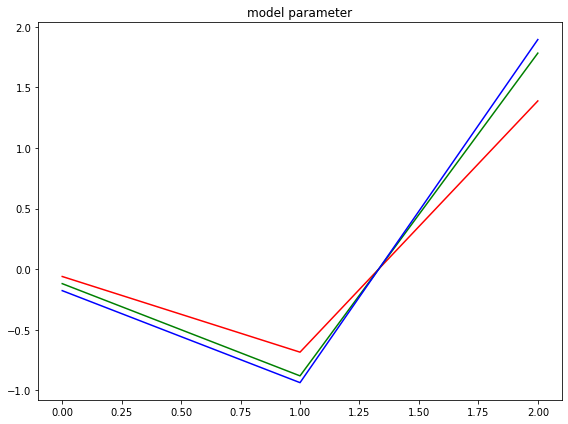

In [13]:
plot_model_parameter(theta_iteration)

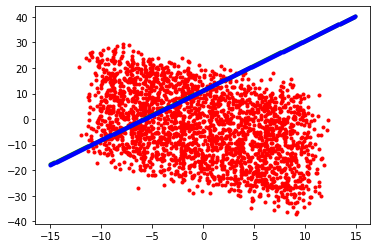

In [45]:
plt.plot(xx, zz, '.', color = 'red')
#aa, bb = np.meshgrid(XX,ZZ)
plt.plot(XX, ZZ[0], '.', color = 'green')
plt.plot(YY, ZZ[1], '.', color = 'blue')

In [1]:
# ===== FILL UP THE CODE =====

X  = np.arange(-15, 15, 0.1)
Y  = np.arange(-15, 15, 0.1)
XX,YY = np.meshgrid(X,Y)

Z = theta[0] + theta[1]*XX + theta[2]*YY
print(XX.shape)
print(YY.shape)
print(ZZ.shape)

#ZZ = np.zeros((XX.shape[0],YY.shape[0]))
#for i in range(0,XX.shape[0]):
#    for j in range(0,YY.shape[0]):
#        ZZ[i][j] = -3 + (-1)*XX[i] + (2)*YY[j]
        

# ============================

def plot_surface(XX, YY, ZZ, xx, yy, zz):

    fig = plt.figure(figsize=(8,8))
    ax  = fig.add_subplot(111, projection='3d')
    plt.title('regression surface')

    ax  = plt.axes(projection='3d')
    # ===== FILL UP THE CODE =====

    ax.scatter(xx, yy, zz, marker='o', color='blue', alpha=0.2)
    #ax.scatter(xx, yy, f, marker='o', color='yellow', alpha=0.2)
    #ax.scatter(XX, YY, ZZ, marker='o', color='yellow', alpha=0.2)
    ax.plot_wireframe(XX,YY,ZZ)
    ax.view_init(90,0)
    
    # ============================
    plt.tight_layout()
    plt.show()

NameError: name 'np' is not defined

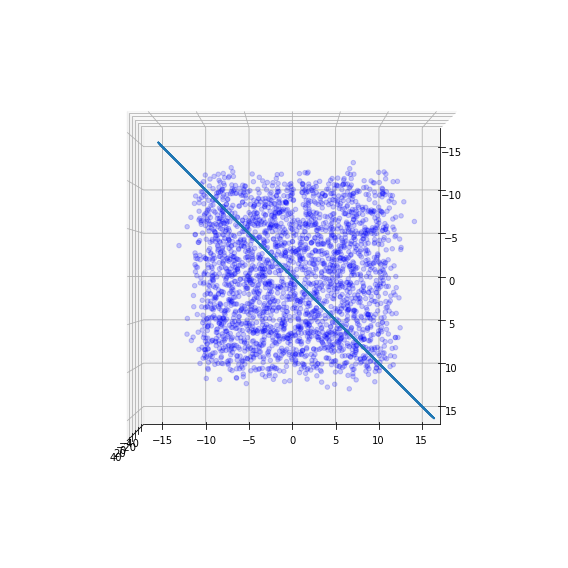

In [64]:
plot_surface(XX, YY, ZZ, xx, yy, zz)

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

# * results

# * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * * *

### # 01. plot the input data in blue point in 3-dimensional space

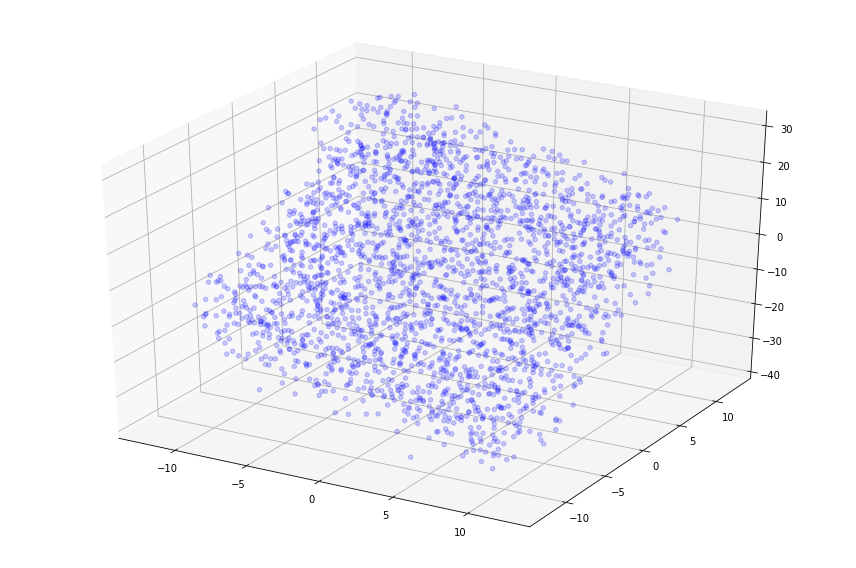

In [18]:
plot_data(xx, yy, zz)

### # 02. plot the values of the model parameters $\theta_0$ in red curve, $\theta_1$ in green curve, and $\theta_2$ in blue curve over the gradient descent iterations

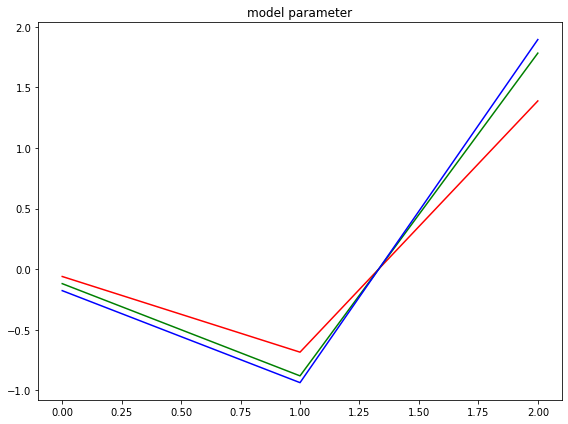

In [19]:
plot_model_parameter(theta_iteration)

### # 03. plot the loss values $\mathcal{L}(\theta)$ in red curve over the gradient descent iterations

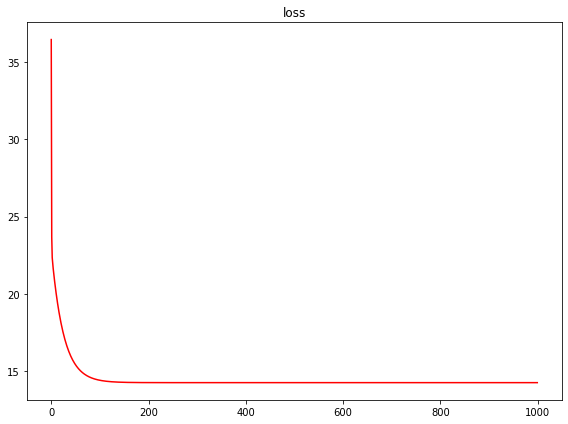

In [20]:
plot_loss_curve(loss_iteration)

### # 04. plot the optimal regression surface $\hat{f}(\theta^*)$ in 3-dimensional space with a given set of data points superimposed

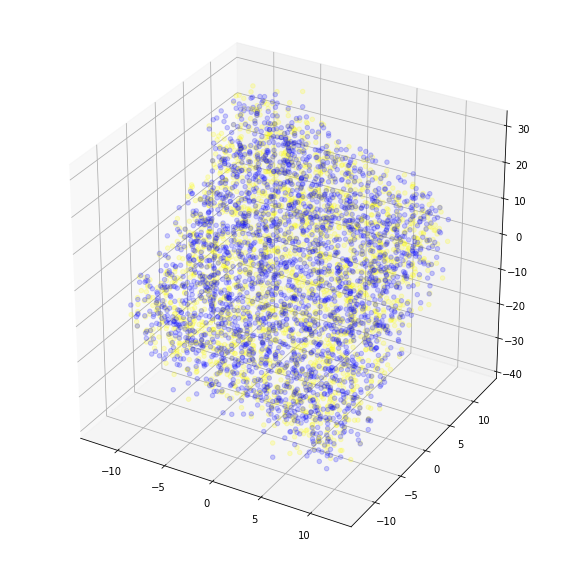

In [21]:
plot_surface(XX, YY, ZZ, xx, yy, zz)